<a href="https://colab.research.google.com/github/enikolaev/AI_in_biotech/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 7. Основы Numpy. Построение графиков

## Numpy

Типовой синтаксис для подключения numpy и matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

Получить массив numpy можно из обычного списка

In [5]:
my_list = [e for e in range(1, 11)]
print(my_list)

my_float_array = np.array(my_list, 'float')
my_int_array = np.array(my_list, 'int')

print(my_float_array, type(my_float_array))
print(my_int_array, type(my_int_array))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] <class 'numpy.ndarray'>
[ 1  2  3  4  5  6  7  8  9 10] <class 'numpy.ndarray'>


Загрузка и обработка данных

In [15]:
salaries_by_company = defaultdict(list)
salaries_by_language = defaultdict(list)

with open('assets/p7_data_04.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Преобразование зарплаты в число (удаление '$' и запятых)
        salary = float(row['Salary'].replace('$', '').replace(',', ''))
        
        # Группировка зарплат по компаниям и языкам
        salaries_by_company[row['Company']].append(salary)
        salaries_by_language[row['Language']].append(salary)

## Визуализация данных


### Распределение зарплат по компаниям

C:\Users\StolyarAM\AppData\Local\Temp\ipykernel_38668\430573556.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_data, labels=companies)


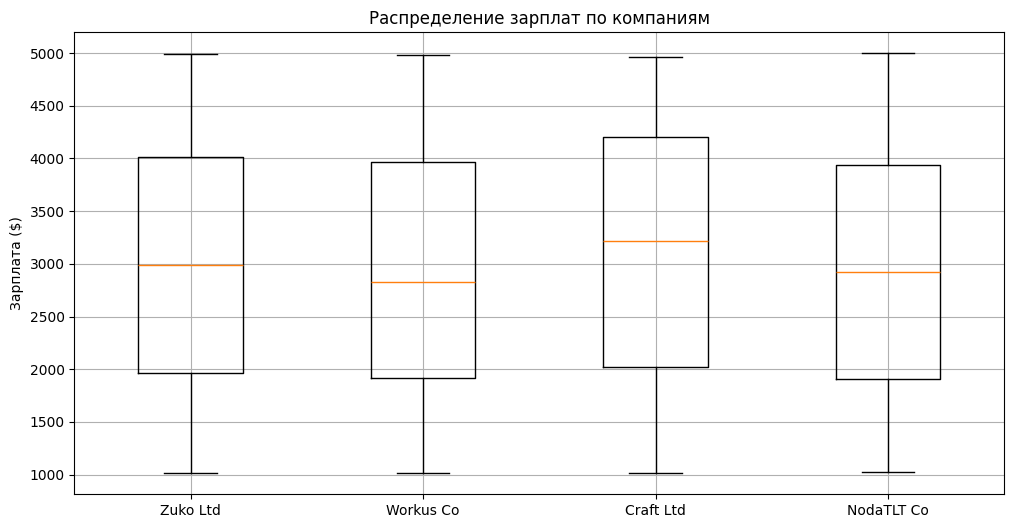

In [16]:
plt.figure(figsize=(12, 6))
companies = list(salaries_by_company.keys())
salary_data = [salaries_by_company[comp] for comp in companies]

plt.boxplot(salary_data, labels=companies)
plt.title('Распределение зарплат по компаниям')
plt.ylabel('Зарплата ($)')
plt.grid(True)
plt.show()


### Средняя зарплата по языкам

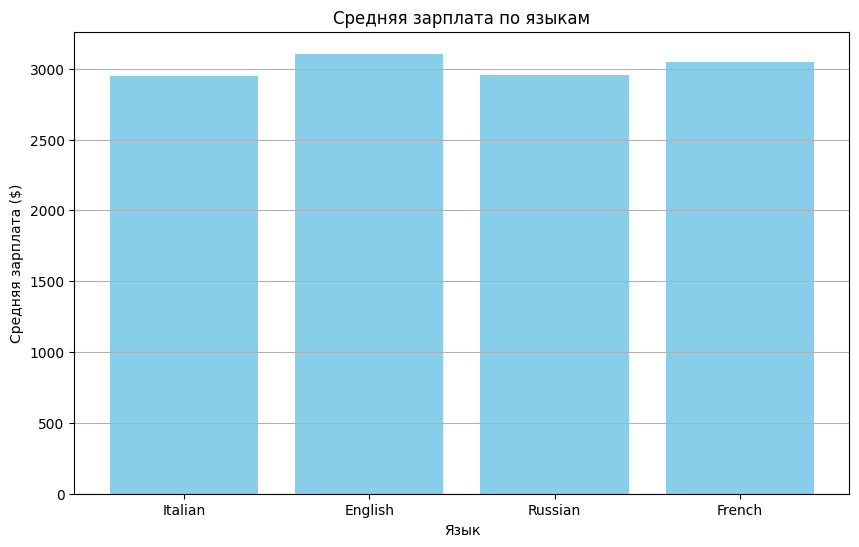

In [17]:
plt.figure(figsize=(10, 6))
languages = list(salaries_by_language.keys())
avg_salaries = [np.mean(salaries_by_language[lang]) for lang in languages]

plt.bar(languages, avg_salaries, color='skyblue')
plt.title('Средняя зарплата по языкам')
plt.xlabel('Язык')
plt.ylabel('Средняя зарплата ($)')
plt.grid(axis='y')
plt.show()

### Гистограмма распределения зарплат

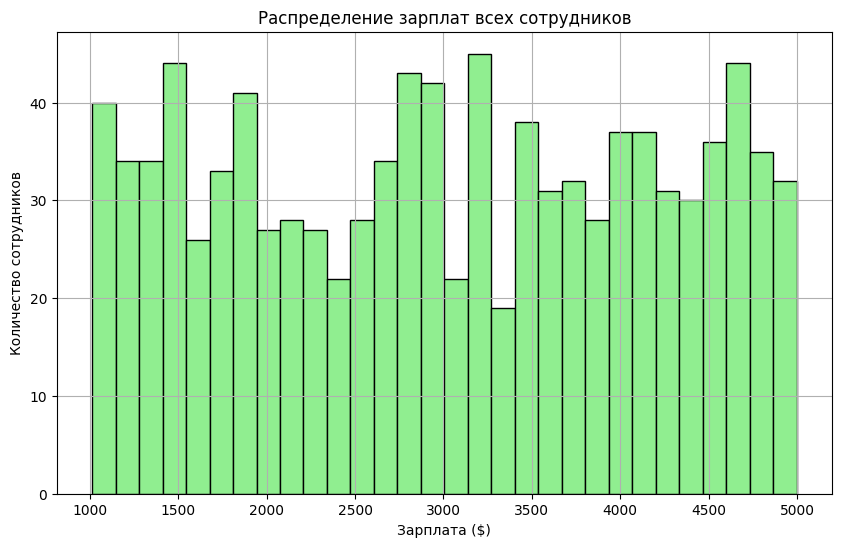

In [18]:
plt.figure(figsize=(10, 6))
all_salaries = [s for comp in salaries_by_company.values() for s in comp]

plt.hist(all_salaries, bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение зарплат всех сотрудников')
plt.xlabel('Зарплата ($)')
plt.ylabel('Количество сотрудников')
plt.grid(True)
plt.show()


## Контрольные вопросы

### Вопрос 1.

Списки Python и массивы Numpy имеют следующие основные различия:

- Тип данных: В списках можно хранить элементы разных типов, а массивы Numpy могут содержать только элементы одного типа.
- Гибкость: Списки более гибкие в использовании благодаря встроенным методам Python. Массивы Numpy предоставляют более эффективные математические операции, но требуют импорта библиотеки.
- Память: Массивы Numpy требуют меньше памяти, так как все элементы имеют один тип данных.


### Вопрос 2. 

Создание массива из списка:

In [19]:
import numpy as np

list_data = [1, 2, 3, 4]
array = np.array(list_data)
print(array)  # [1 2 3 4]`

[1 2 3 4]


Cоздание массива нулей

In [21]:
zeros_array = np.zeros(5)  # массив из 5 нулей
print(zeros_array)  # [0. 0. 0. 0. 0.]

[0. 0. 0. 0. 0.]


Создание массива единиц

In [22]:
ones_array = np.ones(3)  # массив из 3 единиц
print(ones_array)  # [1. 1. 1.]

[1. 1. 1.]


### Вопрос 3.

Умножение вектора на число

In [ ]:
vector = np.array([1, 2, 3])
scalar = 2
result = vector * scalar
print(result)  # [ 2  4  6]

Сложение векторов

In [ ]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
sum_vector = vector1 + vector2
print(sum_vector)  # [ 5  7  9]


### Вопрос 4.

Использование генератора случайных чисел:

In [23]:
import numpy as np

# Случайный вектор из 5 чисел от 0 до 1
random_vector = np.random.rand(5)
print(random_vector)  # [0.7578 0.2345 0.6789 0.1234 0.9876]

# Случайный вектор из 5 целых чисел от 0 до 9
random_int_vector = np.random.randint(0, 10, 5)
print(random_int_vector)  # [4 2 7 1 8]


[0.83372178 0.90326535 0.33242522 0.08170426 0.7475883 ]
[0 0 1 8 0]


### Вопрос 5.

Основные типы диаграмм и функции для их построения:

- Линейный график: plt.plot()
- Столбчатая диаграмма: plt.bar()
- Круговая диаграмма: plt.pie()
- Гистограмма: plt.hist()
- Точечная диаграмма: plt.scatter()
- График ошибок: plt.errorbar()
- График плотности: plt.plot_density()
- Тепловая карта: plt.imshow()

Пример:

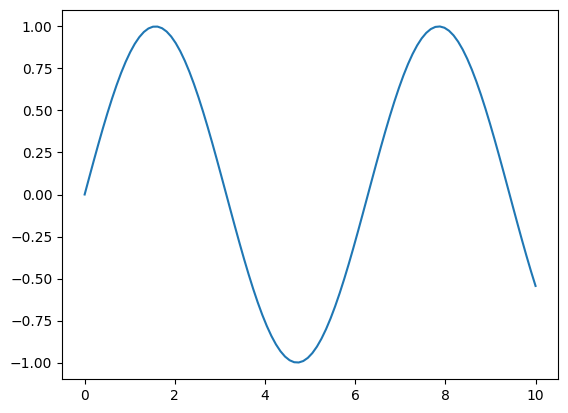

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Линейный график
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()
